# Data Check

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./fuel-prices.csv", names=["Date", "Name", "Price"], sep=";")
display(data)
display(data.info())

,Date,Name,Price
0,2022-06-18T14:40:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
1,2022-06-18T15:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
2,2022-06-18T16:00:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
3,2022-06-18T17:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
4,2022-06-18T18:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
...,...,...,...
4612,2022-12-27T17:30:02+01:00,AVIA XPress TS Raml,1.644
4613,2022-12-27T18:30:01+01:00,AVIA XPress TS Raml,1.643
4614,2022-12-27T19:30:01+01:00,AVIA XPress TS Raml,1.643
4615,2022-12-27T20:30:01+01:00,AVIA XPress TS Raml,1.642


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4617 non-null   object 
 1   Name    4616 non-null   object 
 2   Price   4614 non-null   float64
dtypes: float64(1), object(2)
memory usage: 108.3+ KB


None

In [3]:
data["Date"] = pd.to_datetime(data["Date"], utc=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    4617 non-null   datetime64[ns, UTC]
 1   Name    4616 non-null   object             
 2   Price   4614 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 108.3+ KB


In [4]:
data[data.isnull().any(axis=1)]

,Date,Name,Price
22,2022-06-19 10:00:01+00:00,OMV - Engerwitzdorf Freistädter Straße 50,NaN
46,2022-06-20 10:00:02+00:00,OMV - Engerwitzdorf Freistädter Straße 50,NaN
914,2022-07-26 14:30:18+00:00,NaN,NaN


# Drop faulty rows

In [5]:
data.drop([22, 46, 914], inplace=True, axis="index")

In [6]:
data.isnull().sum()

Date     0
Name     0
Price    0
dtype: int64

# Extract more information out of "Date" column

In [7]:
data["Day Of Week"] = data["Date"].dt.day_name()
data["Month"] = data["Date"].dt.month_name()
data["Week Of Year"] = data["Date"].dt.isocalendar().week
data["Day Of Year"] = data["Date"].dt.dayofyear
data["Year"] = data["Date"].dt.year
data

,Date,Name,Price,Day Of Week,Month,Week Of Year,Day Of Year,Year
0,2022-06-18 12:40:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
1,2022-06-18 13:00:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
2,2022-06-18 14:00:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
3,2022-06-18 15:00:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
4,2022-06-18 16:00:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
...,...,...,...,...,...,...,...,...
4612,2022-12-27 16:30:02+00:00,AVIA XPress TS Raml,1.644,Tuesday,December,52,361,2022
4613,2022-12-27 17:30:01+00:00,AVIA XPress TS Raml,1.643,Tuesday,December,52,361,2022
4614,2022-12-27 18:30:01+00:00,AVIA XPress TS Raml,1.643,Tuesday,December,52,361,2022
4615,2022-12-27 19:30:01+00:00,AVIA XPress TS Raml,1.642,Tuesday,December,52,361,2022


# Overall plot

<AxesSubplot: xlabel='Date', ylabel='Price'>

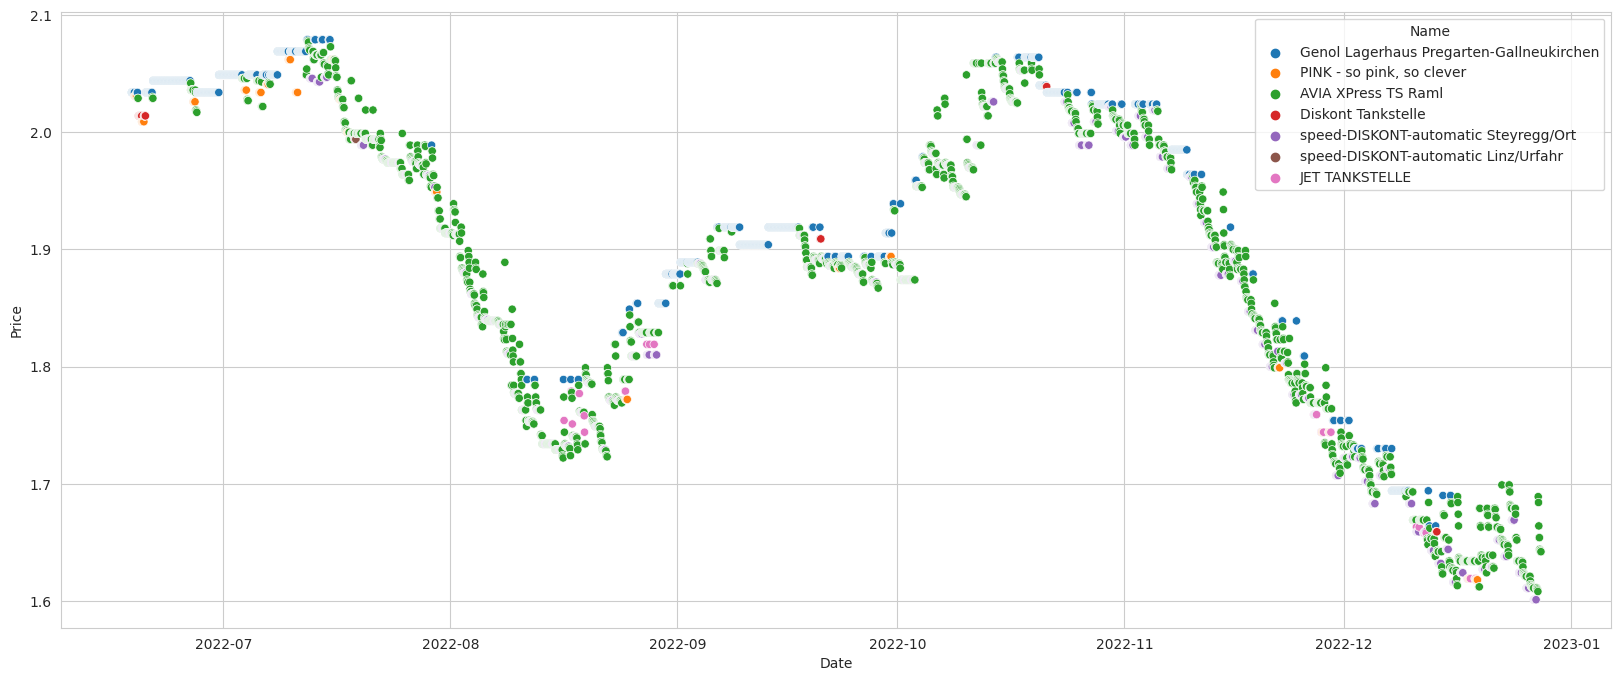

In [8]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data, x="Date", y="Price", hue="Name")

<AxesSubplot: xlabel='Date', ylabel='Price'>

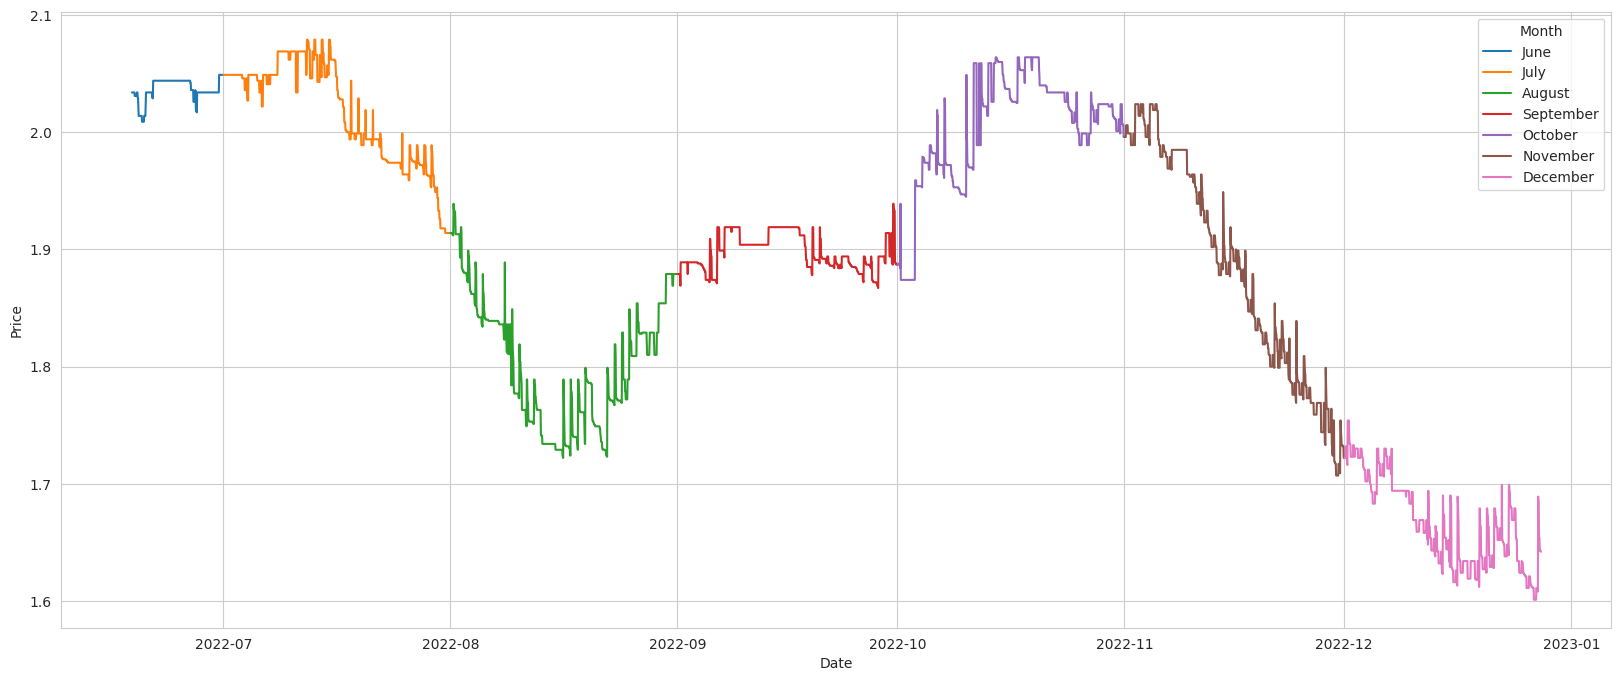

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data, x="Date", y="Price", hue="Month")

# Last week plot

<AxesSubplot: xlabel='Date', ylabel='Price'>

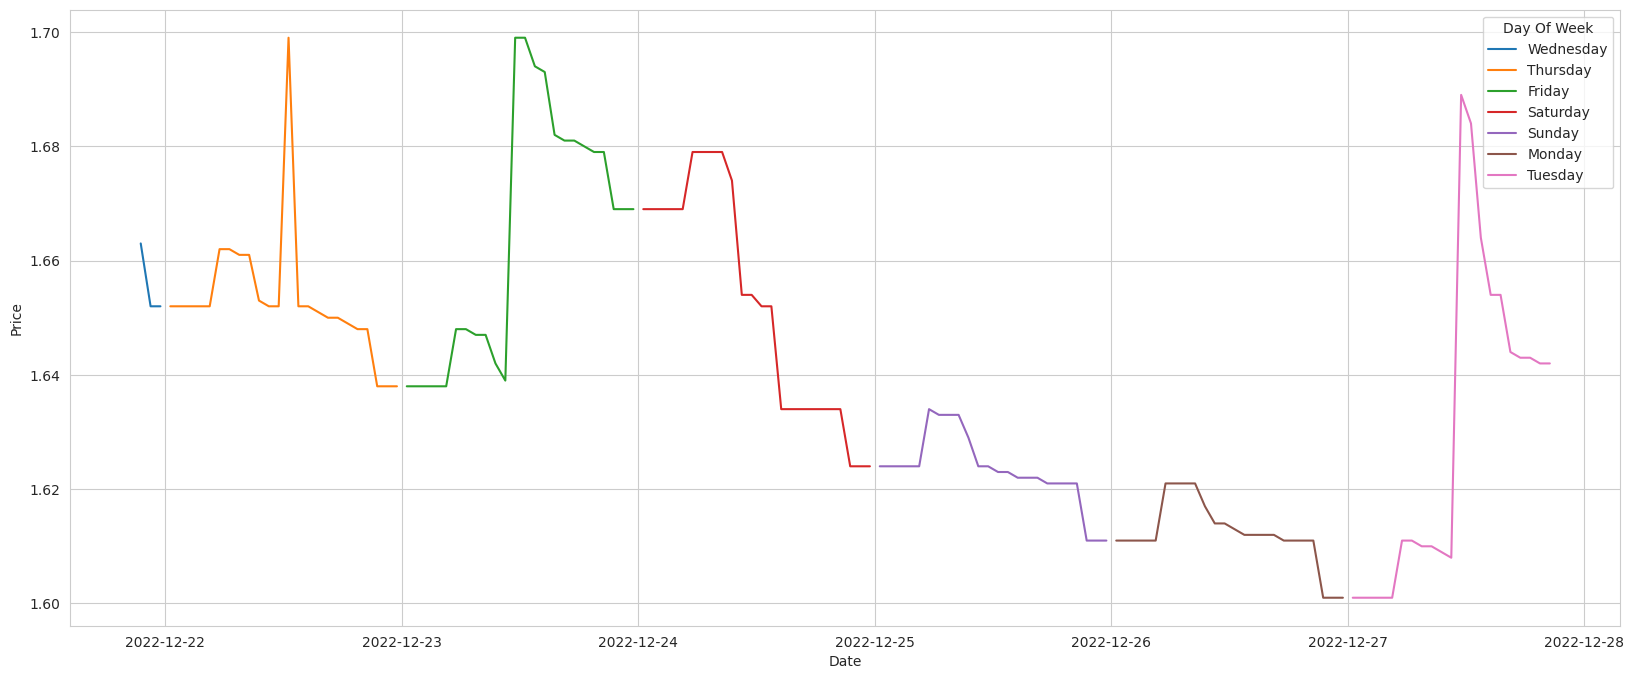

In [10]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data.tail(144), x="Date", y="Price", hue="Day Of Week")

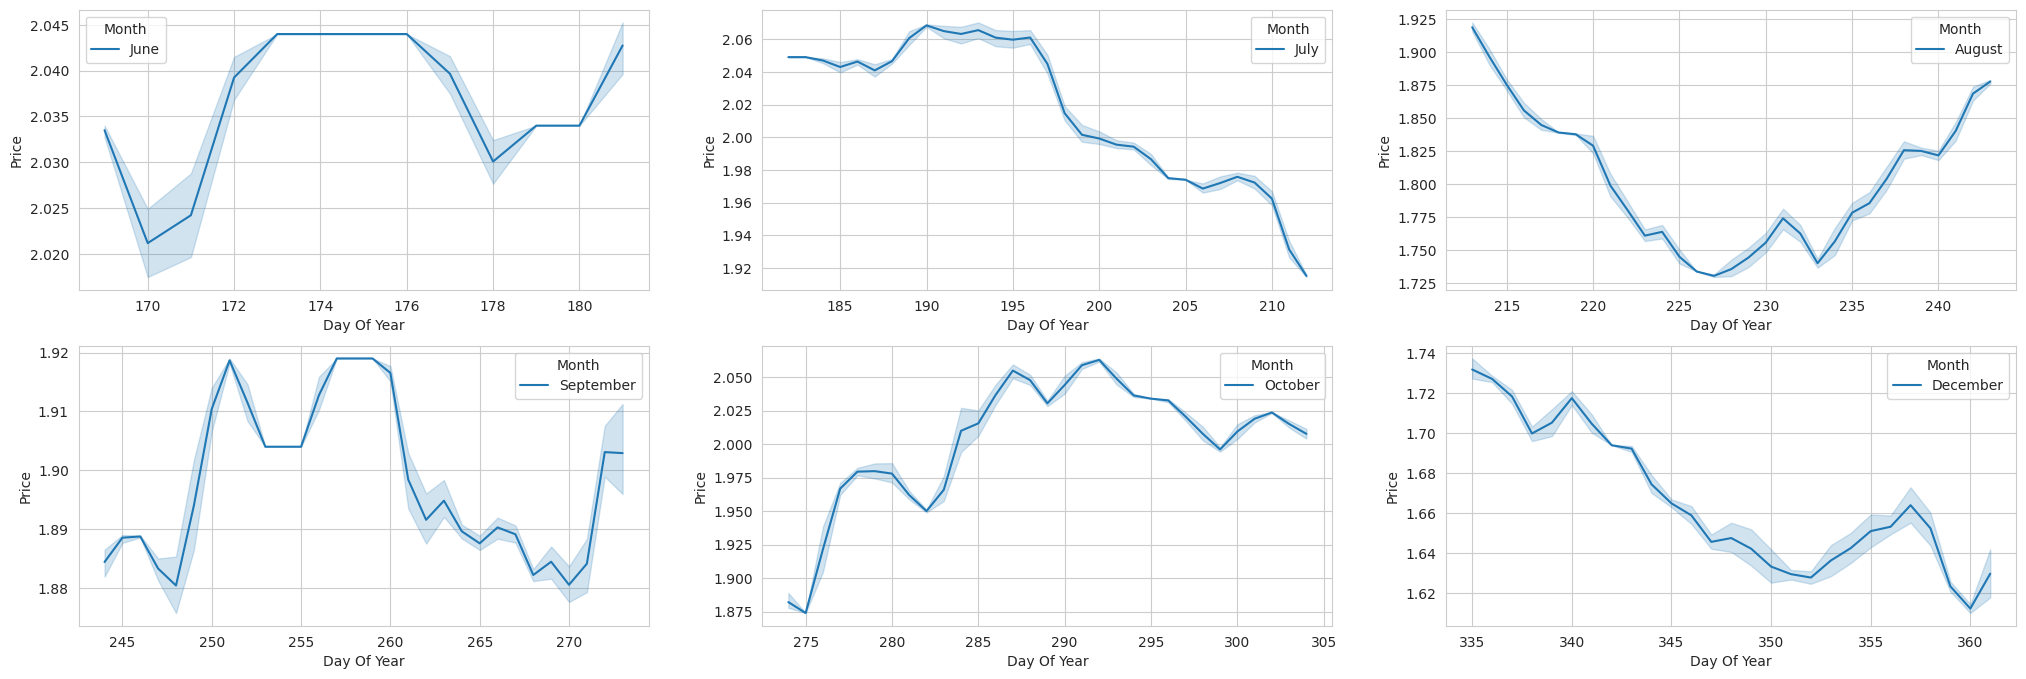

In [23]:
fig, axs = plt.subplots(2,3,figsize=(25,8))

year = 2022

months = [
    ((0,0), "June"), 
    ((0,1), "July"), 
    ((0,2), "August"), 
    ((1,0), "September"), 
    ((1,1), "October"),
    ((1,2), "December"),
]

for pos, month in months:
    sns.lineplot(data=data[(data["Month"] == month) & (data["Year"] == year)], x="Day Of Year", y="Price", hue="Month", ax=axs[pos])

# Min price for each day

In [12]:
min_price_day_of_year = data.loc[data.groupby(["Day Of Year"]).Price.idxmin()]
min_price_day_of_year

,Date,Name,Price,Day Of Week,Month,Week Of Year,Day Of Year,Year
10,2022-06-18 22:00:01+00:00,"PINK - so pink, so clever",2.031,Saturday,June,24,169,2022
34,2022-06-19 22:00:02+00:00,"PINK - so pink, so clever",2.009,Sunday,June,24,170,2022
36,2022-06-20 00:00:01+00:00,"PINK - so pink, so clever",2.009,Monday,June,25,171,2022
68,2022-06-21 08:30:02+00:00,AVIA XPress TS Raml,2.029,Tuesday,June,25,172,2022
84,2022-06-22 00:30:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.044,Wednesday,June,25,173,2022
...,...,...,...,...,...,...,...,...
4500,2022-12-23 00:30:02+00:00,speed-DISKONT-automatic Steyregg/Ort,1.638,Friday,December,51,357,2022
4545,2022-12-24 21:30:02+00:00,speed-DISKONT-automatic Steyregg/Ort,1.624,Saturday,December,51,358,2022
4569,2022-12-25 21:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.611,Sunday,December,51,359,2022
4593,2022-12-26 21:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.601,Monday,December,52,360,2022


# Max price for each day

In [13]:
max_price_day_of_year = data.loc[data.groupby(["Day Of Year"]).Price.idxmax()]
max_price_day_of_year

,Date,Name,Price,Day Of Week,Month,Week Of Year,Day Of Year,Year
0,2022-06-18 12:40:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
17,2022-06-19 05:00:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Sunday,June,24,170,2022
47,2022-06-20 11:00:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Monday,June,25,171,2022
70,2022-06-21 10:30:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.044,Tuesday,June,25,172,2022
84,2022-06-22 00:30:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.044,Wednesday,June,25,173,2022
...,...,...,...,...,...,...,...,...
4511,2022-12-23 11:30:01+00:00,AVIA XPress TS Raml,1.699,Friday,December,51,357,2022
4529,2022-12-24 05:30:01+00:00,AVIA XPress TS Raml,1.679,Saturday,December,51,358,2022
4553,2022-12-25 05:30:01+00:00,AVIA XPress TS Raml,1.634,Sunday,December,51,359,2022
4577,2022-12-26 05:30:02+00:00,AVIA XPress TS Raml,1.621,Monday,December,52,360,2022


# Price each day incl. variation

<AxesSubplot: xlabel='Day Of Year', ylabel='Price'>

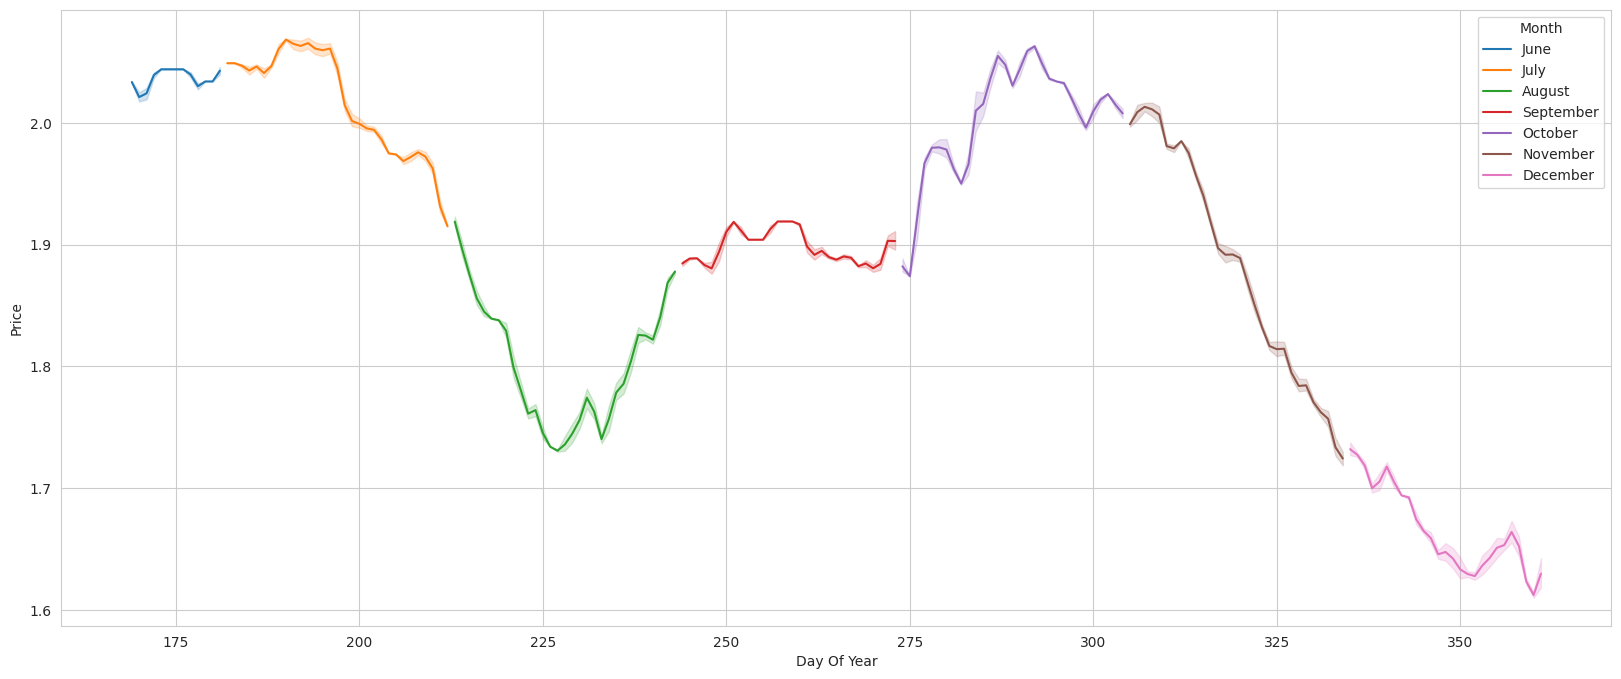

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data, x="Day Of Year", y="Price", hue="Month")

# Min price per week

In [15]:
min_price_week_of_year = data.loc[data.groupby(["Week Of Year"]).Price.idxmin()]
min_price_week_of_year

,Date,Name,Price,Day Of Week,Month,Week Of Year,Day Of Year,Year
34,2022-06-19 22:00:02+00:00,"PINK - so pink, so clever",2.009,Sunday,June,24,170,2022
36,2022-06-20 00:00:01+00:00,"PINK - so pink, so clever",2.009,Monday,June,25,171,2022
213,2022-06-27 09:30:01+00:00,AVIA XPress TS Raml,2.017,Monday,June,26,178,2022
426,2022-07-06 06:30:01+00:00,AVIA XPress TS Raml,2.022,Wednesday,July,27,187,2022
706,2022-07-17 22:30:02+00:00,"PINK - so pink, so clever",2.000,Sunday,July,28,198,2022
839,2022-07-23 11:30:02+00:00,AVIA XPress TS Raml,1.974,Saturday,July,29,204,2022
1027,2022-07-31 07:30:01+00:00,AVIA XPress TS Raml,1.914,Sunday,July,30,212,2022
1149,2022-08-05 09:30:01+00:00,AVIA XPress TS Raml,1.834,Friday,August,31,217,2022
1345,2022-08-13 13:30:01+00:00,AVIA XPress TS Raml,1.734,Saturday,August,32,225,2022
1413,2022-08-16 09:30:01+00:00,AVIA XPress TS Raml,1.722,Tuesday,August,33,228,2022


<AxesSubplot: xlabel='Week Of Year', ylabel='Price'>

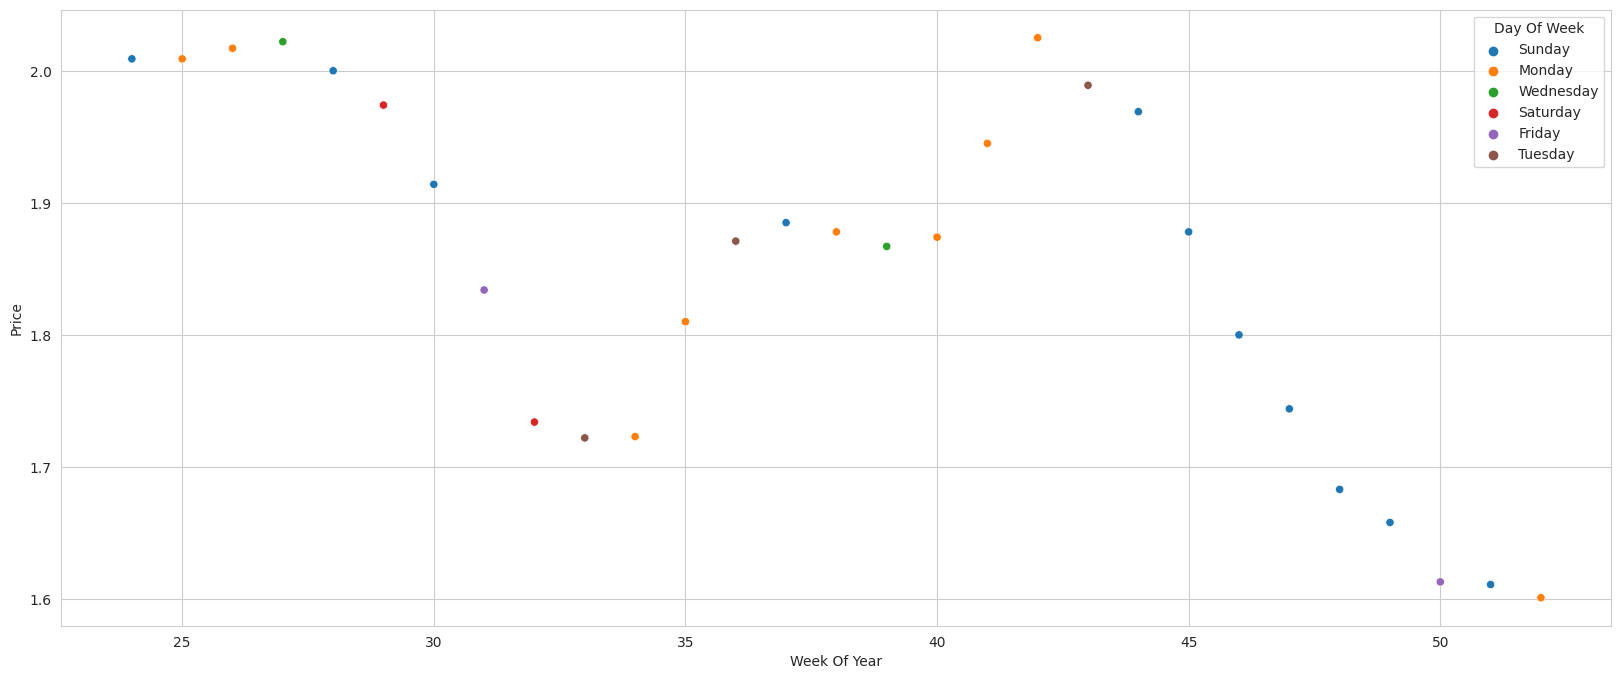

In [16]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=min_price_week_of_year, x="Week Of Year", y="Price", hue="Day Of Week")

In [17]:
min_price_week_of_year.groupby(["Day Of Week"])["Price"].count().sort_values().reset_index(name='Counts')


,Day Of Week,Counts
0,Friday,2
1,Saturday,2
2,Wednesday,2
3,Tuesday,3
4,Monday,9
5,Sunday,11


In [18]:
mean_price_day_of_week = data.groupby(["Day Of Week"]).mean()["Price"].to_frame().reindex([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
mean_price_day_of_week

/tmp/ipykernel_46695/4254406945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price_day_of_week = data.groupby(["Day Of Week"]).mean()["Price"].to_frame().reindex([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


,Price
Day Of Week,
Monday,1.884833
Tuesday,1.891019
Wednesday,1.898781
Thursday,1.898830
Friday,1.899091
Saturday,1.892795
Sunday,1.883845


<AxesSubplot: xlabel='Day Of Week', ylabel='Price'>

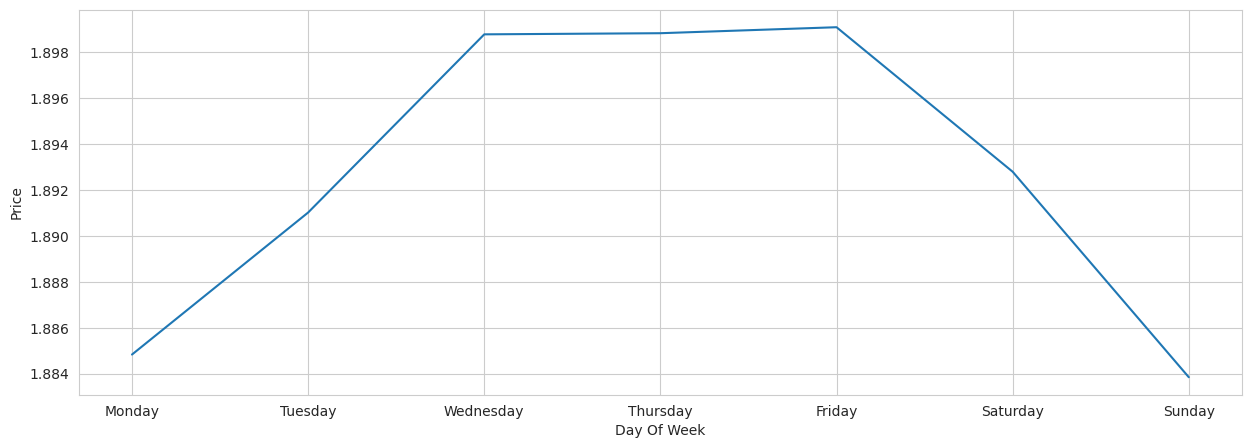

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(data=mean_price_day_of_week, x="Day Of Week", y="Price")